In [1]:
!pip install nibabel
!pip install nilearn
!pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import image
import nibabel

C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
data_dir = r'C:\Users\MONSTER\ds002748-fmriprep'

In [4]:
from glob import glob
import os

data_dir = r"C:\Users\MONSTER\ds002748-fmriprep"

# `func` klasörü içindeki dosyaları aramak için desenleri güncelleme
brain_mask_files = sorted(glob(os.path.join(data_dir, '**/func/*brain_mask.nii.gz'), recursive=True))
MNI_files = sorted(glob(os.path.join(data_dir, '**/func/*MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'), recursive=True))
bold_files = sorted(glob(os.path.join(data_dir, '**/func/*task-rest_desc-preproc_bold.nii.gz'), recursive=True))
confounds_paths = sorted(glob(os.path.join(data_dir, '**/func/*confounds_timeseries.tsv'), recursive=True))

print("brain_mask_files:", brain_mask_files)
print("MNI_files:", MNI_files)
print("bold_files:", bold_files)
print("confounds_paths:", confounds_paths)

brain_mask_files: ['C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-01\\func\\sub-01_task-rest_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-01\\func\\sub-01_task-rest_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-01\\func\\sub-01_task-rest_space-T1w_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-02\\func\\sub-02_task-rest_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-02\\func\\sub-02_task-rest_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-02\\func\\sub-02_task-rest_space-T1w_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-03\\func\\sub-03_task-rest_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-03\\func\\sub-03_task-rest_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'C:\\Users\\MONSTER\\ds002748-fmriprep\\sub-03\\func\\sub-03_task-rest_space-T1w_desc-brain_mask.

In [5]:
import pandas
conf_df = pandas.read_table(confounds_paths[0])
conf_df.head()


,global_signal,global_signal_derivative1,global_signal_power2,global_signal_derivative1_power2,csf,csf_derivative1,csf_derivative1_power2,csf_power2,white_matter,white_matter_derivative1,...,aroma_motion_01,aroma_motion_02,aroma_motion_04,aroma_motion_05,aroma_motion_07,aroma_motion_08,aroma_motion_09,aroma_motion_12,aroma_motion_14,aroma_motion_15
0,1016.817309,NaN,1.033917e+06,NaN,1290.715247,NaN,NaN,1.665946e+06,1039.798077,NaN,...,1.364133,-1.722431,0.784186,1.123117,-1.400853,0.730426,-1.554664,-1.731178,0.429063,-0.659356
1,1016.071620,-0.745688,1.032402e+06,0.556051,1283.087151,-7.628095,58.187839,1.646313e+06,1040.158421,0.360344,...,-0.881900,-1.823915,0.957782,-0.828779,0.195014,-1.904547,-1.403632,-1.637476,1.275585,-0.640507
2,1017.882077,1.810457,1.036084e+06,3.277754,1285.158754,2.071602,4.291536,1.651633e+06,1041.778174,1.619753,...,1.213365,-1.460820,0.926264,1.183792,0.483683,-0.031791,-1.261391,0.758988,-0.580735,-0.752762
3,1018.445107,0.563030,1.037230e+06,0.317003,1286.413632,1.254878,1.574719,1.654860e+06,1042.415207,0.637033,...,-1.150660,-1.243981,1.353235,0.066687,0.437776,-1.346764,-0.508917,-0.117207,1.241091,0.670088
4,1017.156087,-1.289020,1.034607e+06,1.661573,1282.518355,-3.895277,15.173182,1.644853e+06,1041.653693,-0.761514,...,0.720435,-1.318376,0.834434,1.060158,-1.946056,0.465642,-0.891533,-0.813171,-0.439035,0.373695


In [6]:
print(len(brain_mask_files),len(MNI_files),len(bold_files),len(confounds_paths))

216 72 72 72


# Create outcome variable
We need to define a variable that holds the outcome variable (1 or 0) that indicates whether or not the resting-state images were recorded with depressif patients or healthy.

In [7]:
import pandas as pd

# Load the .tsv file into a pandas DataFrame
participants_df = pd.read_csv(r"C:\Users\MONSTER\Desktop\Samsung Inv. Campus\participants.tsv", sep='\t')

# View the first 10 rows of the DataFrame
participants_df.head(10)

,participant_id,age,gender,group,IQ_Raven,ICD-10,MADRS,Zung_SDS,BDI,HADS-anx,HADS-depr,MC-SDS,TAS-26,ECR-avoid,ECR-anx,RRS-sum,RRS-reflection,RRS-brooding,RRS-depr,Edinburgh
0,sub-01,39,m,depr,113.0,F32.0,NaN,43.0,17.0,NaN,NaN,9.0,81.0,66.0,60.0,53.0,12.0,14.0,27.0,NaN
1,sub-02,50,m,depr,80.0,F32.0,NaN,47.0,10.0,NaN,NaN,15.0,54.0,62.0,78.0,59.0,14.0,12.0,33.0,NaN
2,sub-03,47,f,depr,87.0,F32.0,NaN,44.0,19.0,NaN,NaN,15.0,80.0,42.0,54.0,47.0,11.0,9.0,27.0,NaN
3,sub-04,32,f,depr,100.0,F32.0,NaN,34.0,6.0,NaN,NaN,10.0,71.0,42.0,39.0,37.0,9.0,9.0,19.0,NaN
4,sub-05,26,f,depr,104.0,F32.0,NaN,48.0,17.0,NaN,NaN,10.0,65.0,52.0,68.0,61.0,14.0,13.0,34.0,NaN
5,sub-06,42,m,depr,104.0,F32.0,NaN,42.0,16.0,NaN,NaN,13.0,55.0,52.0,50.0,56.0,14.0,12.0,30.0,NaN
6,sub-07,28,f,depr,94.0,F32.0,NaN,35.0,3.0,NaN,NaN,13.0,51.0,56.0,36.0,44.0,10.0,10.0,24.0,NaN
7,sub-08,28,m,depr,92.0,F32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sub-09,52,f,depr,77.0,F32.0,NaN,50.0,12.0,NaN,NaN,13.0,77.0,52.0,52.0,46.0,12.0,10.0,24.0,NaN
9,sub-10,24,m,depr,99.0,F34.1,NaN,42.0,22.0,NaN,NaN,12.0,79.0,72.0,59.0,49.0,11.0,11.0,27.0,NaN


Atlas ROIs are located in nifti image (4D) at: C:\Users\MONSTER/nilearn_data\basc_multiscale_2015\template_cambridge_basc_multiscale_nii_sym\template_cambridge_basc_multiscale_sym_scale064.nii.gz


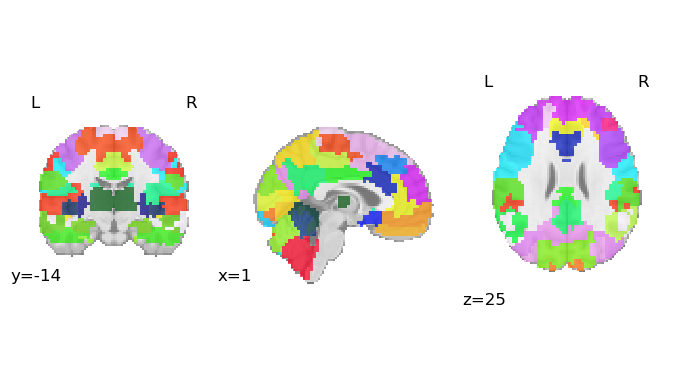

In [8]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064


print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)
# initialize masker (change verbosity)
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=0)

# initialize correlation measure, set to vectorize
correlation_measure = ConnectivityMeasure(kind='correlation',
                                         )
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

In [9]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
import numpy as np
from nilearn.image import resample_to_img

# Initialize ConnectivityMeasure object
correlation_measure = ConnectivityMeasure(kind='correlation')

all_features = []  # Initialize the container for data

for i, sub in enumerate(bold_files):
    try:
        # Load data image
        data_img = sub

        # Resample label image to match data image
        resampled_label_img = resample_to_img(atlas_filename, data_img, interpolation='nearest')

        # Create NiftiLabelsMasker with resampled label image
        masker = NiftiLabelsMasker(labels_img=resampled_label_img)

        # Extract time series from data image
        time_series = masker.fit_transform(data_img)
        print("Time series shape:", time_series.shape)  # Debugging line

        # Compute correlation matrices
        correlation_matrices = correlation_measure.fit_transform([time_series])

        # Ensure correlation_matrices is a list of correlation matrices
        correlation_matrix = correlation_matrices[0]
        print("Correlation matrix shape:", correlation_matrix.shape)  # Debugging line

        all_features.append(correlation_matrix)
        print('Finished %s of %s' % (i + 1, len(bold_files)))
    except EOFError as e:
        print(f"Skipping file due to EOFError: {sub}")


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 1 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 2 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 3 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 4 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 5 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 6 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 63)
Correlation matrix shape: (63, 63)
Finished 7 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 8 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 9 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 10 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 11 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 12 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 13 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 14 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 15 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 16 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 17 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 18 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 19 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 20 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 21 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 22 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 23 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 24 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 25 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 26 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 27 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 63)
Correlation matrix shape: (63, 63)
Finished 28 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 29 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 30 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 51)
Correlation matrix shape: (51, 51)
Finished 31 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 60)
Correlation matrix shape: (60, 60)
Finished 32 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 58)
Correlation matrix shape: (58, 58)
Finished 33 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 41)
Correlation matrix shape: (41, 41)
Finished 34 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 35 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 61)
Correlation matrix shape: (61, 61)
Finished 36 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 37 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 38 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 39 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 56)
Correlation matrix shape: (56, 56)
Finished 40 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 58)
Correlation matrix shape: (58, 58)
Finished 41 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 42 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 43 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 44 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 45 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 46 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 60)
Correlation matrix shape: (60, 60)
Finished 47 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 49)
Correlation matrix shape: (49, 49)
Finished 48 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 63)
Correlation matrix shape: (63, 63)
Finished 49 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 55)
Correlation matrix shape: (55, 55)
Finished 50 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 51 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 52 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 53 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 54 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 55 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 56 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 63)
Correlation matrix shape: (63, 63)
Finished 57 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 58 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 59 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 60 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 62)
Correlation matrix shape: (62, 62)
Finished 61 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 62 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 63 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 63)
Correlation matrix shape: (63, 63)
Finished 64 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 65 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 66 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 67 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 61)
Correlation matrix shape: (61, 61)
Finished 68 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 55)
Correlation matrix shape: (55, 55)
Finished 69 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 62)
Correlation matrix shape: (62, 62)
Finished 70 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 71 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


Time series shape: (100, 64)
Correlation matrix shape: (64, 64)
Finished 72 of 72


C:\Users\MONSTER\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


In [10]:
from nilearn import plotting
%matplotlib inline
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [11]:
from numpy.random import seed
seed(0)

In [12]:
file_path = r"C:\Users\MONSTER\Desktop\Samsung Inv. Campus\participants.tsv"

# Read the TSV file
participants_csv = pd.read_csv(file_path, sep="\t")
labels = participants_csv["group"][:72]

In [13]:
print(labels)

0        depr
1        depr
2        depr
3        depr
4        depr
       ...   
67    control
68    control
69    control
70    control
71    control
Name: group, Length: 72, dtype: object


In [14]:
import nibabel as nib

# Örnek bir fMRI dosyasının yolunu tanımlayın
fMRI_file_path =bold_files[0]

# fMRI dosyasını yükle
fMRI_img = nib.load(fMRI_file_path)

# fMRI görüntüsünün veri matrisini alın
fMRI_data = fMRI_img.get_fdata()

# fMRI veri matrisinin şeklini kontrol edin (zaman noktalarını içerir)
num_time_points = fMRI_data.shape[-1]
print("Number of time points:", num_time_points)

# fMRI veri matrisinin diğer boyutlarını kontrol edin
x_dimension = fMRI_data.shape[0]
y_dimension = fMRI_data.shape[1]
z_dimension = fMRI_data.shape[2]
print("Dimensions (x, y, z):", x_dimension, y_dimension, z_dimension)

# fMRI veri matrisinin voxel boyutlarını kontrol edin
voxel_size = fMRI_img.header.get_zooms()
print("Voxel size (mm):", voxel_size)


Number of time points: 100
Dimensions (x, y, z): 112 112 25
Voxel size (mm): (1.9642857, 1.9642857, 5.0, 2.5)


In [16]:
X_train=all_features
# En büyük boyuta sahip olan diziyi bul
max_shape = max([array.shape for array in X_train])

# Dizileri aynı boyuta getir
X_train_resized = [np.pad(array, ((0, max_shape[0]-array.shape[0]), (0, max_shape[1]-array.shape[1])), mode='constant') for array in X_train]

# Şimdi farklı boyutlara sahip dizileri birleştirebilirsiniz
combined_data = np.concatenate(X_train_resized)
combined_data.shape

(4608, 64)

In [17]:
labels_repeated = np.repeat(labels, 64)

In [18]:
print(labels_repeated)

0        depr
0        depr
0        depr
0        depr
0        depr
       ...   
71    control
71    control
71    control
71    control
71    control
Name: group, Length: 4608, dtype: object


In [19]:
X=combined_data
y=np.array(labels_repeated)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Initialize a Support Vector Classifier
clf = SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9436008676789588


In [21]:
from sklearn.model_selection import cross_val_score

# SVC modeli için
clf = SVC()

# k-Kat Çapraz Doğrulama ile modelin doğruluğunu hesaplama
scores = cross_val_score(clf, X, y, cv=5)  # 'cv' parametresi k'nin değerini belirtir.

print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation Accuracy: 0.68 (+/- 0.11)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# SVC modeli için parametre ızgarasını tanımlama
param_grid = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'linear']
}

# GridSearchCV nesnesi oluşturma
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Grid aramasını çalıştırma
grid_search.fit(X, y)

# En iyi parametreleri ve skoru yazdırma
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)

En İyi Parametreler: {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
En İyi Skor: 0.7393632781495167


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# En iyi parametrelerle SVC modelini oluşturma ve eğitme
svc_optimized = SVC(C=10.0, gamma=1.0, kernel='rbf')
svc_optimized.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = svc_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimize Edilmiş SVC Modelinin Doğruluk Skoru: {accuracy:.2f}")

Optimize Edilmiş SVC Modelinin Doğruluk Skoru: 0.96


In [24]:
from sklearn.model_selection import cross_val_score

# En iyi parametrelerle SVC modeli için k-kat çapraz doğrulama
cv_scores = cross_val_score(svc_optimized, X, y, cv=5)
print(f"Optimize Edilmiş SVC Modelinin Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")

Optimize Edilmiş SVC Modelinin Çapraz Doğrulama Doğruluk Skoru: 0.74 (+/- 0.04)


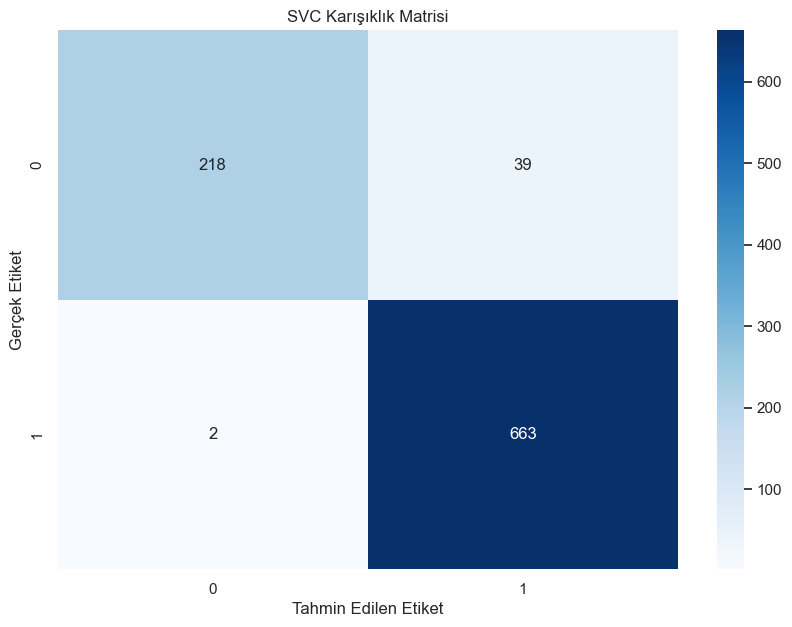

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optimize edilmiş SVC modelinizle test seti üzerinde tahmin yapma
y_pred_svc = svc_optimized.predict(X_test)  # svc_optimized, optimize edilmiş SVC modelinizi temsil ediyor

# Karışıklık matrisini hesaplama
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10,7))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues")
plt.title('SVC Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.75


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Logistic Regression modelini oluşturma
log_reg = LogisticRegression(max_iter=1000)

# k-Kat Çapraz Doğrulama ile modelin doğruluğunu hesaplama
# cv parametresi çapraz doğrulamanın kaç kat yapıldığını belirtir, örneğin burada 5 kat kullanılmıştır.
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Logistic Regression Cross Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")


Logistic Regression Cross Validation Accuracy: 0.62 (+/- 0.05)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluşturma ve eğitme
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = dec_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.83


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Decision Tree modelini oluşturma
dec_tree = DecisionTreeClassifier(random_state=42)

# k-Kat Çapraz Doğrulama ile modelin doğruluğunu hesaplama
# cv parametresi çapraz doğrulamanın kaç kat yapıldığını belirtir, örneğin burada 5 kat kullanılmıştır.
cv_scores = cross_val_score(dec_tree, X, y, cv=5)

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Decision Tree Cross Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")


Decision Tree Cross Validation Accuracy: 0.62 (+/- 0.07)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.92


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest modelini oluşturma
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# k-Kat Çapraz Doğrulama ile modelin doğruluğunu hesaplama
# cv parametresi çapraz doğrulamanın kaç kat yapıldığını belirtir, örneğin burada 5 kat kullanılmıştır.
cv_scores = cross_val_score(random_forest, X, y, cv=5)

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Random Forest Cross Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")


Random Forest Cross Validation Accuracy: 0.72 (+/- 0.06)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parametre gridini tanımlama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV nesnesi oluşturma
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Grid aramasını çalıştırma
grid_search_rf.fit(X, y)

# En iyi parametreleri ve skoru yazdırma
print("En İyi Parametreler:", grid_search_rf.best_params_)
print("En İyi Skor:", grid_search_rf.best_score_)

En İyi Parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
En İyi Skor: 0.7280858069484973


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# En iyi parametrelerle RandomForest modelini oluşturma ve eğitme
rf_optimized = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300, random_state=42)
rf_optimized.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = rf_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimize Edilmiş RandomForest Modelinin Doğruluk Skoru: {accuracy:.2f}")

Optimize Edilmiş RandomForest Modelinin Doğruluk Skoru: 0.89


In [39]:
from sklearn.model_selection import cross_val_score

# En iyi parametrelerle RandomForest modeli için k-kat çapraz doğrulama
cv_scores = cross_val_score(rf_optimized, X, y, cv=5)
print(f"Optimize Edilmiş RandomForest Modelinin Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")

Optimize Edilmiş RandomForest Modelinin Çapraz Doğrulama Doğruluk Skoru: 0.73 (+/- 0.04)


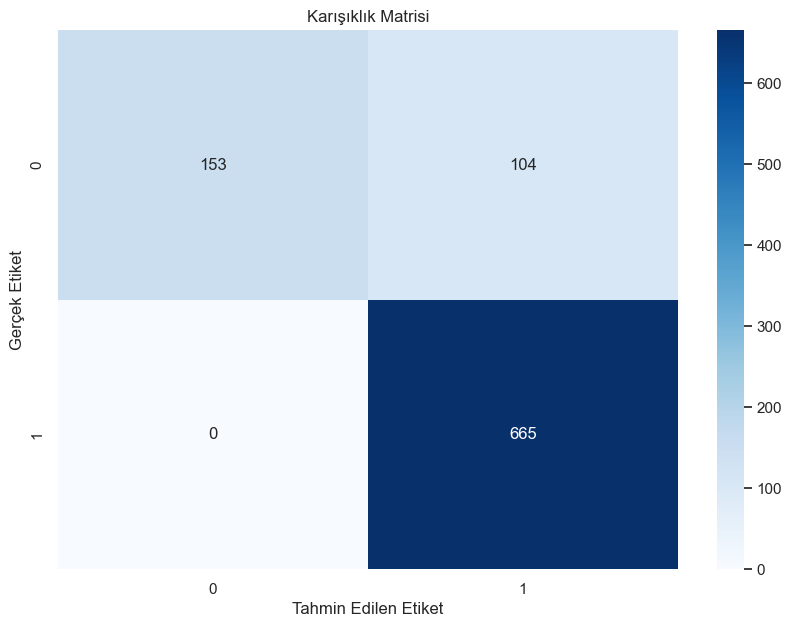

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optimize edilmiş modelinizle test seti üzerinde tahmin yapma
# Örneğin, RandomForestClassifier için optimize edilmiş modeliniz varsayalım
y_pred = rf_optimized.predict(X_test)

# Karışıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modelini oluşturma ve eğitme
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve doğruluk hesaplama
y_pred = gradient_boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

Gradient Boosting Accuracy: 0.89


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting modelini oluşturma
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# k-Kat Çapraz Doğrulama ile modelin doğruluğunu hesaplama
# cv parametresi çapraz doğrulamanın kaç kat yapıldığını belirtir, örneğin burada 5 kat kullanılmıştır.
cv_scores = cross_val_score(gradient_boosting, X, y, cv=5)

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Gradient Boosting Cross Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")


Gradient Boosting Cross Validation Accuracy: 0.68 (+/- 0.08)
